<a href="https://colab.research.google.com/github/junaid1729/Ezitech_internship/blob/main/Task02/task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:

# Name: Muhammad Junaid Iftikhar
# Roll Number: Ezi-ML-B1-161
# Shift Time: 3:00 PM - 6:00 PM
# Internship Type: hybird

# TASK 02

# DATASET USED: Titanic data set link : https://www.kaggle.com/datasets/yasserh/titanic-dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler

**Reading csv file**

In [4]:
df=pd.read_csv('Titanic-Dataset - Copy.csv')

**Checking for missing values**

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Imputing the feature "Age"**

In [27]:
# Group by Pclass, SibSp, and Parch, then impute Age
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'SibSp', 'Parch'])['Age'].transform('mean'))
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))

**Imputing cabin Feature**

In [32]:
# Extract Deck as first character of Cabin, turning NaN into 'U'
df['Deck'] = df['Cabin'].fillna('U').astype(str).str[0]
df['Cabin'].fillna('U', inplace=True)
print(df['Deck'].isnull().sum())

0


/tmp/ipython-input-32-1450248836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('U', inplace=True)


**Imputing "Embarked" feature**

In [30]:
# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

**Checking that no missing values remain after imputation**

In [39]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Saving imputation in csv file**

In [50]:
df.to_csv("Titanic-Dataset - Copy.csv", index=False)


In [51]:
# Showing count of nulls in each column
print(df.isnull().sum().sort_values(ascending=False))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
Title          0
dtype: int64


**Encoding feature "sex" with one hot encoding**

In [44]:


# Extracting Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Extracting Deck from Cabin
df['Deck'] = df['Cabin'].fillna('U').astype(str).str[0]

# Selecting features for one-hot encoding
features_to_encode = ['Sex', 'Embarked', 'Pclass', 'Deck', 'Title']

# One-hot encode them
df_encoded = pd.get_dummies(df, columns=features_to_encode, drop_first=False)

#Saving the final dataset
df_encoded.to_csv("Titanic-Dataset - Copy.csv", index=False)



In [48]:
print(df_encoded.filter(regex='Sex_|Embarked_|Deck_|Title_').head())

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Deck_A  Deck_B  \
0       False      True       False       False        True   False   False   
1        True     False        True       False       False   False   False   
2        True     False       False       False        True   False   False   
3        True     False       False       False        True   False   False   
4       False      True       False       False        True   False   False   

   Deck_C  Deck_D  Deck_E  ...  Title_Major  Title_Master  Title_Miss  \
0   False   False   False  ...        False         False       False   
1    True   False   False  ...        False         False       False   
2   False   False   False  ...        False         False        True   
3    True   False   False  ...        False         False       False   
4   False   False   False  ...        False         False       False   

   Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0     

**Performing label encoding on features : "Name" , "Ticket" , "Cabin" , "PassengerId"**

In [55]:

# Columns to label encode
cols_to_encode = ['Ticket', 'Cabin', 'Name', 'PassengerId']

# Initializing LabelEncoder
le = LabelEncoder()

# Applying label encoding to each selected column
for col in cols_to_encode:
    df[col + '_LE'] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid errors with NaNs

# Saving  the updated dataset
df.to_csv("Titanic-Dataset - Copy.csv", index=False)

**Checking the dataset afer label encoding**

In [56]:
print(df[['Ticket_LE', 'Cabin_LE', 'Name_LE', 'PassengerId_LE']].head())

   Ticket_LE  Cabin_LE  Name_LE  PassengerId_LE
0        523       147      108               0
1        596        81      190             111
2        669       147      353             222
3         49        55      272             333
4        472       147       15             444


**Applying standard scalar on numerical features of the dataset**

In [58]:

# Selecting numerical features
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initializing  and apply StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=[col + "_scaled" for col in numerical_cols])

# Merging scaled features back into your original DataFrame
df = pd.concat([df, df_scaled], axis=1)

# Saving the updated dataset
df.to_csv("Titanic-Dataset - Copy.csv", index=False)

**Confirming that mean approx to 0 and standard deviation approx to 1**

In [60]:
print(df[['Age_scaled', 'Fare_scaled', 'SibSp_scaled', 'Parch_scaled']].describe())

         Age_scaled   Fare_scaled  SibSp_scaled  Parch_scaled
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.193033e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.189233e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.702141e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.023974e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    5.551469e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.781182e+00  9.667167e+00  6.784163e+00  6.974147e+00


**Comparing distributions before and after applying standard scaling**

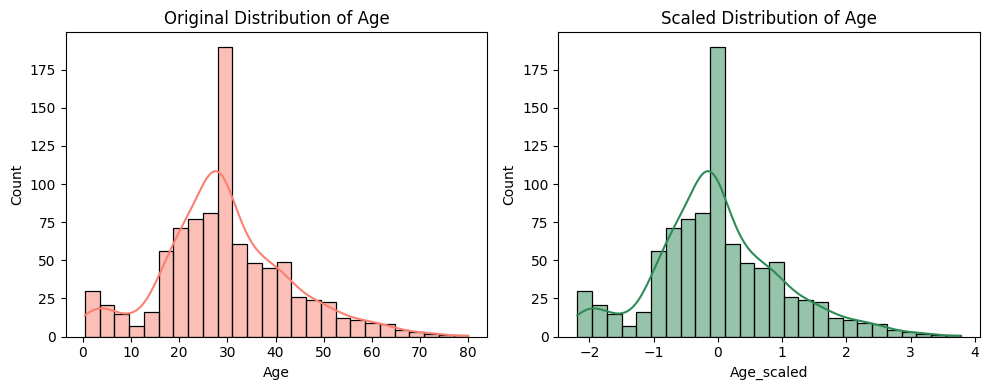

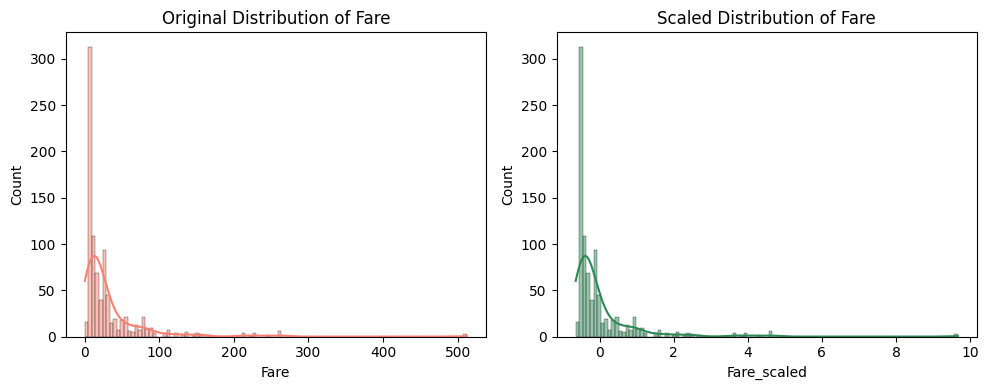

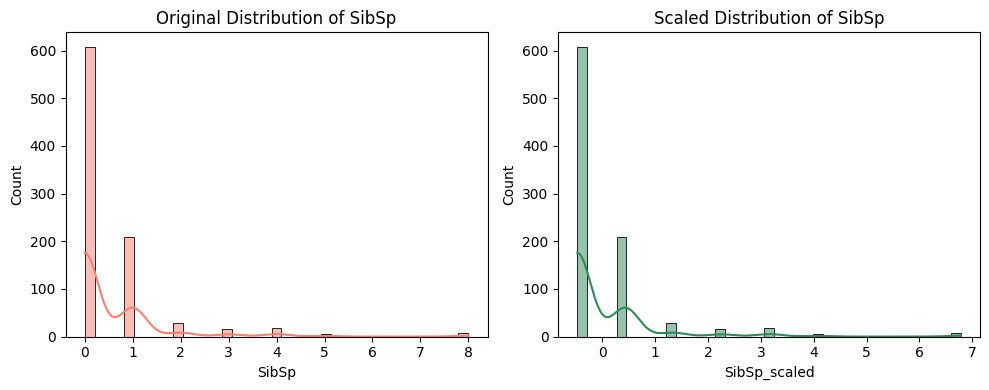

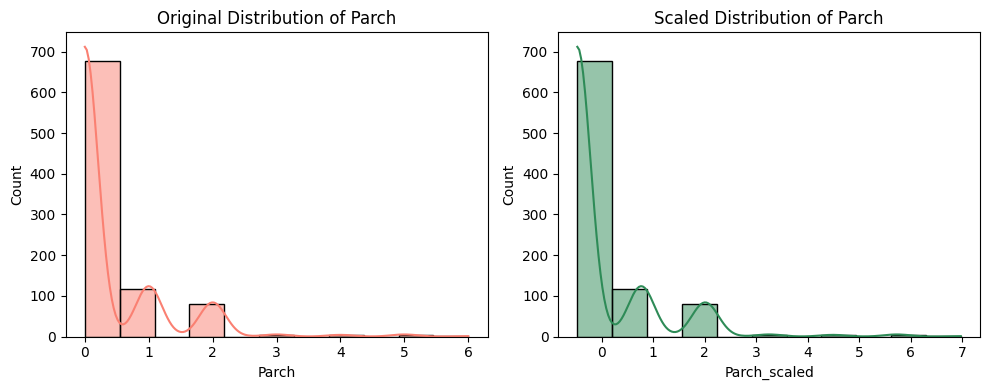

In [61]:


# Comparing original vs scaled distributions
features = ['Age', 'Fare', 'SibSp', 'Parch']

for feature in features:
    plt.figure(figsize=(10, 4))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color='salmon')
    plt.title(f"Original Distribution of {feature}")

    # Scaled distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[feature + '_scaled'], kde=True, color='seagreen')
    plt.title(f"Scaled Distribution of {feature}")

    plt.tight_layout()
    plt.show()

**Creating new Feature "FamilySize" by combining "SibSP" and "Parch"**

In [63]:
# adding num of spouses and siblings with num of parents and children plus 1 (the individual itself)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Saving updated dataset
df.to_csv("Titanic-Dataset - Copy.csv", index=False)